In [1]:
messi = "../../image4labs/messi.jpg"
open_CV_logo = "../../image4labs/openCV_logo_white.png"
king = "../../image4labs/king_cards.png"
figure = "/../lab21.11/simple.jpeg"
sudoku = "../../image4labs/sudoku.jpg"
star = "../../image4labs/star.jpg"
star2 = "../../image4labs/star2.png"
tunder = "../../image4labs/tunder.png"

In [52]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread(star2, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(
    thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
M = cv.moments(cnt)
print(M)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

{'m00': 190066.0, 'm10': 53941160.5, 'm01': 34988262.0, 'm20': 20203339249.5, 'm11': 10013806204.583332, 'm02': 8544281234.0, 'm30': 8496852496168.45, 'm21': 3786686845606.8164, 'm12': 2457763485894.4834, 'm03': 2358394998193.2, 'mu20': 4894715949.7685375, 'mu11': 84058347.74386215, 'mu02': 2103473947.1594086, 'mu30': -15163763393.902344, 'mu21': 19847239415.165527, 'mu12': 1929426206.6343994, 'mu03': 11087507302.402832, 'nu20': 0.13549355072870786, 'nu11': 0.002326869244525402, 'nu02': 0.05822751654862345, 'nu30': -0.0009628217934899861, 'nu21': 0.0012601986824206893, 'nu12': 0.00012250874353693286, 'nu03': 0.0007040002794112155}


In [53]:
area = cv.contourArea(cnt)
print(f"Area of contour: {area}")

Area of contour: 190066.0


In [54]:
perimeter = cv.arcLength(cnt, True)
print("perimeter = ", perimeter)

perimeter =  2868.891473889351


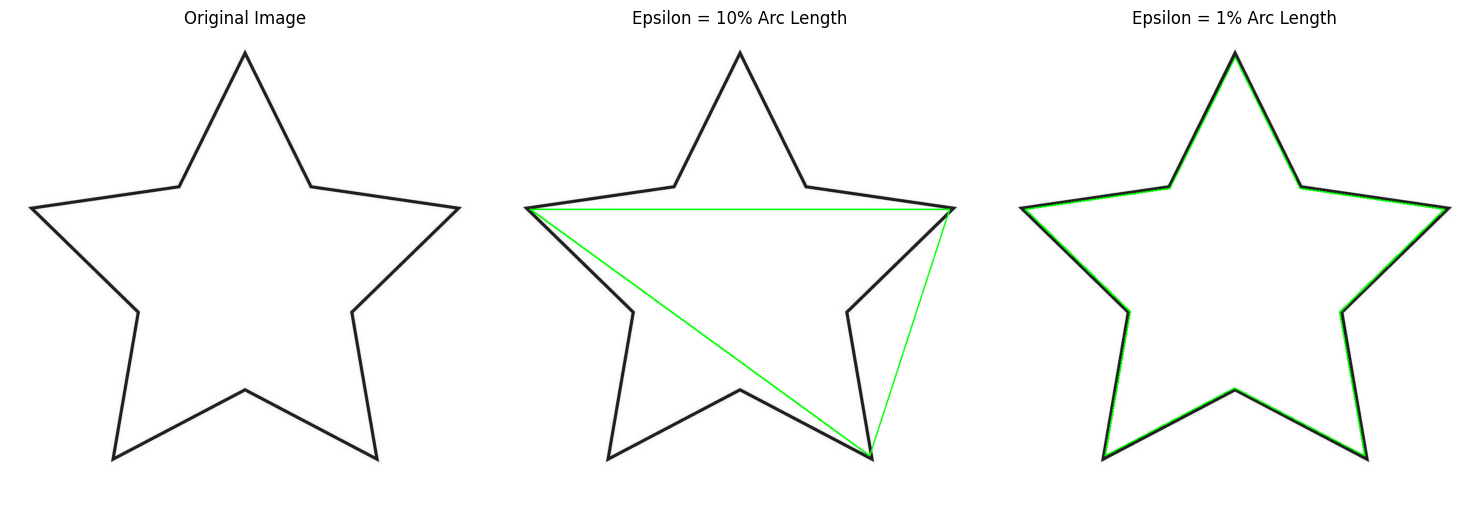

In [3]:
epsilon_10 = 0.1 * cv.arcLength(cnt, True)
approx_10 = cv.approxPolyDP(cnt, epsilon_10, True)

epsilon_1 = 0.01 * cv.arcLength(cnt, True)
approx_1 = cv.approxPolyDP(cnt, epsilon_1, True)

# Создайте копии для рисования контуров
img_original = cv.cvtColor(img, cv.COLOR_GRAY2BGR)  # Для отображения в цвете
img_approx_10 = img_original.copy()
img_approx_1 = img_original.copy()

# Нарисуйте контуры
cv.drawContours(img_approx_10, [approx_10], -1,
                (0, 255, 0), 2)  # Зеленая линия
cv.drawContours(img_approx_1, [approx_1], -1, (0, 255, 0), 2)  # Зеленая линия

# Показать изображения с помощью matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv.cvtColor(img_original, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Epsilon = 10% Arc Length")
plt.imshow(cv.cvtColor(img_approx_10, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Epsilon = 1% Arc Length")
plt.imshow(cv.cvtColor(img_approx_1, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

/var/folders/yq/np50nwk9203g5sqvh63mc6180000gn/T/ipykernel_52388/1179586177.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-x * vy / vx) + y)
/var/folders/yq/np50nwk9203g5sqvh63mc6180000gn/T/ipykernel_52388/1179586177.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols - x) * vy / vx) + y)


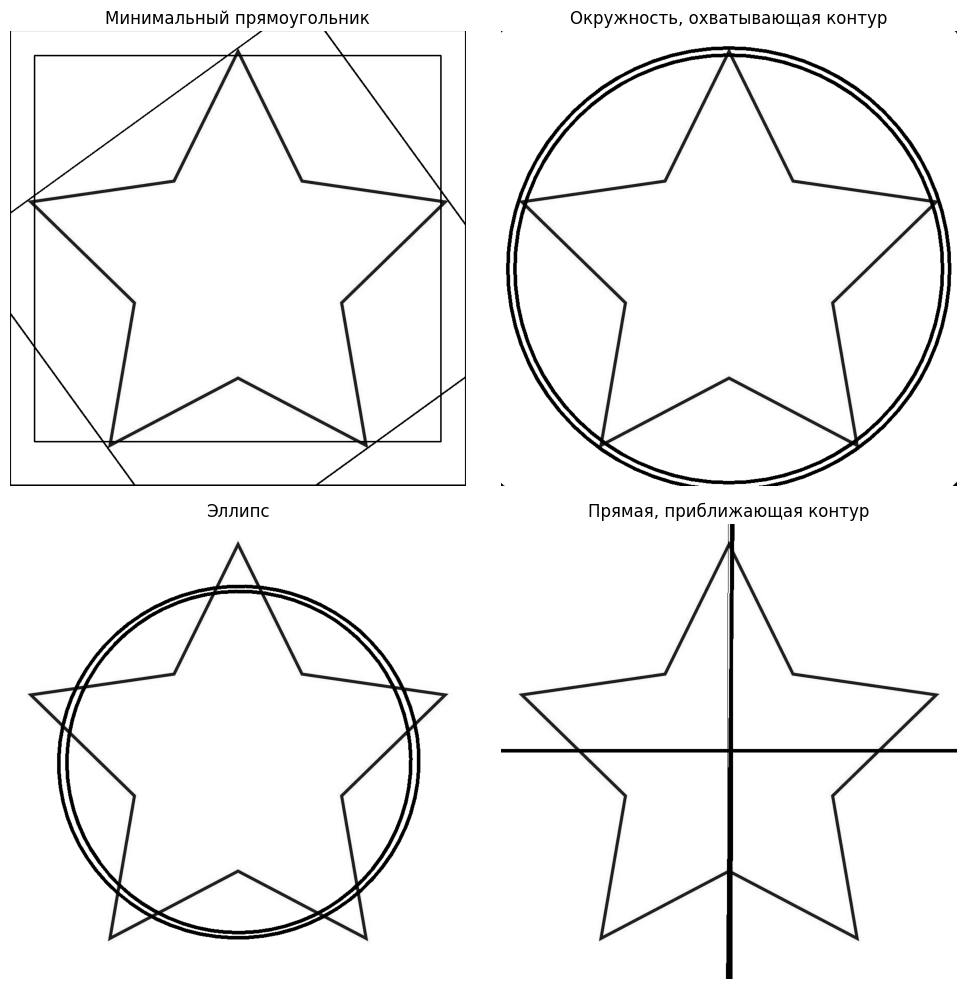

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения и обработка
img = cv.imread(star, cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read, check with os.path.exists()"
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Подготовка четырех изображений
img1 = img.copy()
img2 = img.copy()
img3 = img.copy()
img4 = img.copy()

# Первая картинка с минимальным прямоугольником
for cnt in contours:
    rect = cv.minAreaRect(cnt)
    box = cv.boxPoints(rect)
    box = np.int32(box)
    cv.drawContours(img1, [box], 0, (0, 0, 255), 2)

# Вторая картинка с окружностью, охватывающей контур
for cnt in contours:
    (x, y), radius = cv.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)
    cv.circle(img2, center, radius, (0, 255, 0), 5)  # Толстая линия

# Третья картинка с эллипсом (проверка на количество точек)
for cnt in contours:
    if len(cnt) >= 5:  # Проверяем, что количество точек в контуре хотя бы 5
        ellipse = cv.fitEllipse(cnt)
        cv.ellipse(img3, ellipse, (0, 255, 0), 5)  # Толстая линия

# Четвертая картинка с прямой, приближающей контур
rows, cols = img.shape[:2]
for cnt in contours:
    [vx, vy, x, y] = cv.fitLine(cnt, cv.DIST_L2, 0, 0.01, 0.01)
    lefty = int((-x * vy / vx) + y)
    righty = int(((cols - x) * vy / vx) + y)
    cv.line(img4, (cols - 1, righty), (0, lefty),
            (0, 255, 0), 5)  # Толстая линия

# Отображение четырех картинок с помощью Matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title("Минимальный прямоугольник")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title("Окружность, охватывающая контур")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.title("Эллипс")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
plt.title("Прямая, приближающая контур")
plt.axis('off')

plt.tight_layout()
plt.show()